<a href="https://colab.research.google.com/github/arnabbiswas66/multimodal-fake-news-classifier/blob/main/Weibo_multimodal_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import re
from os import listdir
import shutil
import glob
import copy
import random
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

## Initial Google Drive and Colab setup

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
BASE_SAVE_LOCATION = "/content/drive/MyDrive/multimodal-news"
CHECKPOINT_FILEPATH = '/content/drive/MyDrive/multimodal-news/weibo/'

In [4]:
# image copy pipeline from Gdrive to Colab
! mkdir "/content/images"
! cp "/content/drive/MyDrive/multimodal-news/weibo-data/images.zip" "/content/images"
! unzip -q -d "/content/images" "/content/images/images.zip"

## EDA

In [76]:
def get_df(file):
    return pd.read_csv(file, sep='|',header = None)

In [77]:
train_df_fake = get_df('/content/drive/MyDrive/multimodal-news/weibo-data/tweets/train_rumor.txt')
train_df_real = get_df('/content/drive/MyDrive/multimodal-news/weibo-data/tweets/train_nonrumor.txt')
test_df_fake = get_df('/content/drive/MyDrive/multimodal-news/weibo-data/tweets/test_rumor.txt')
test_df_real = get_df('/content/drive/MyDrive/multimodal-news/weibo-data/tweets/test_nonrumor.txt')

In [78]:
train_df_fake.shape, train_df_real.shape, test_df_fake.shape, test_df_real.shape

((11194, 15), (11349, 15), (2934, 15), (2988, 15))

In [79]:
train_fake = train_df_fake[0].tolist()
train_real = train_df_real[0].tolist()
test_fake = test_df_fake[0].tolist()
test_real = test_df_real[0].tolist()

In [81]:
def fix_offset(list_):
    fixed_flag = False

    while not fixed_flag:
        exit_flag=False
        temp = copy.deepcopy(list_)
        for i,v in enumerate(temp):
            if v!=None:
                if 'sinaimg.cn' in v:
                    if list_[i+1] !=None:
                        if list_[i+1].isdigit():
                            list_.insert(i+1,None)
                            exit_flag=True
                            break
        if not exit_flag:
            fixed_flag=True
            
    return list_

In [82]:
train_fake = fix_offset(train_fake) 
train_real = fix_offset(train_real)
test_fake = fix_offset(test_fake)
test_real = fix_offset(test_real)

In [84]:
def break_in_block(list_):
    temp = []
    for i in range(0,len(list_),3):
        temp.append(list_[i:i+3])
    return temp

In [85]:
train_fake = break_in_block(train_fake)
train_real = break_in_block(train_real)
test_fake = break_in_block(test_fake)
test_real = break_in_block(test_real)

In [86]:
len(train_fake),len(train_real),len(test_fake),len(test_real)

(3748, 3783, 1000, 996)

In [87]:
def get_image_and_text_list(blocks_list):
    image_list = []
    text_list = []
    for i in blocks_list:
        if i[-1] !=None:
            image_list.append(i[1])
            text_list.append(i[-1])
    image_list = [i.split('/')[-1] for i in image_list]
    return image_list, text_list

In [88]:
train_fake_image,train_fake_text = get_image_and_text_list(train_fake)
train_real_image,train_real_text = get_image_and_text_list(train_real)
test_fake_image,test_fake_text = get_image_and_text_list(test_fake)
test_real_image,test_real_text = get_image_and_text_list(test_real)

In [89]:
train_fake_Y = [0]*len(train_fake_image)
train_real_Y = [1]*len(train_real_image)
test_fake_Y = [0]*len(test_fake_image)
test_real_Y = [1]*len(test_real_image)

In [90]:
train_images = train_fake_image+train_real_image
train_text = train_fake_text + train_real_text
trainY = train_fake_Y+train_real_Y

test_images = test_fake_image+test_real_image
test_text = test_fake_text+test_real_text
testY = test_fake_Y+test_real_Y

In [91]:
len(train_images),len(train_text),len(trainY),len(test_images),len(test_text),len(testY)

(7481, 7481, 7481, 1930, 1930, 1930)

In [94]:
train_images = np.array(train_images)
train_text = np.array(train_text)
trainY = np.array(trainY)
test_images = np.array(test_images)
test_text = np.array(test_text)
testY = np.array(testY)

In [ ]:
#!mv "/content/drive/MyDrive/multimodal-news/weibo-data/nonrumor_images/"* "/content/drive/MyDrive/multimodal-news/weibo-data/rumor_images"

In [ ]:
#!mv "/content/drive/MyDrive/multimodal-news/weibo-data/rumor_images" "/content/drive/MyDrive/multimodal-news/weibo-data/images"

In [95]:
def index_to_delete(list_):
    list_images_dir = listdir('/content/images/images')
    gif_list = ['957e1cf2tw1e5foxts295g206o03p4qp.gif','a716fd45jw1ev0cgf8j46g209505zh4i.gif','005vnhZYgw1evupo8ttddg308w06o4qp.gif','7da75521gw1ele2jvi85rg2096056u0x.gif']
    index = []
    for i,v in enumerate(list_):
        if v not in list_images_dir:
            index.append(i)
        if v in gif_list:
            index.append(i)
    return index

In [96]:
train_delete_index =index_to_delete(train_images)
test_delete_index = index_to_delete(test_images)
len(train_delete_index)+len(test_delete_index)

4147

In [97]:
train_images = np.delete(train_images,train_delete_index)
train_text = np.delete(train_text,train_delete_index)
trainY = np.delete(trainY,train_delete_index)
test_images = np.delete(test_images,test_delete_index)
test_text = np.delete(test_text,test_delete_index)
testY = np.delete(testY,test_delete_index)

In [98]:
shuffle_index= np.arange(len(train_images))
np.random.shuffle(shuffle_index)
train_images = train_images[shuffle_index]
train_text = train_text[shuffle_index]
trainY = trainY[shuffle_index]

In [99]:
shuffle_index

array([1047, 3672, 2865, ...,  768, 1253, 1645])

In [100]:
len(train_images),len(train_text),len(trainY),len(test_images),len(test_text),len(testY)

(4140, 4140, 4140, 1124, 1124, 1124)

In [101]:
# calculate the maximum document length
def max_length(lines):
    return max([len(s) for s in lines])

max len 498


(array([5.800e+02, 5.580e+02, 2.404e+03, 5.530e+02, 3.100e+01, 8.000e+00,
        4.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 498.]),
 <BarContainer object of 10 artists>)

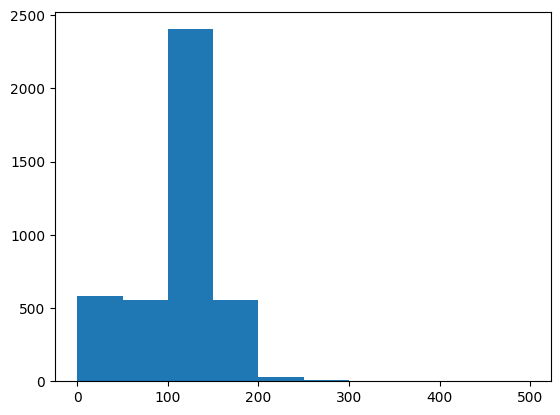

In [102]:
print(f'max len {max_length(train_text)}')
plt.hist([len(s) for s in train_text],bins=[0,50,100,150,200,250,300,350,400,450,498])

In [103]:
max_seq_length=200

In [104]:
train_df = pd.DataFrame()
train_df['tweetText'] = pd.Series(train_text)
train_df['images_1'] = pd.Series(train_images)
train_df['label'] = pd.Series(trainY)
train_df.head()

,tweetText,images_1,label
0,开车挖鼻的注意了哈！,005MN8vJgw1exghduzk97j30m805wmxz.jpg,0
1,#新刊#【你支持Uber吗？】6月25日凌晨，有媒体刊出神州专车的“Beat U”系列主题广...,470bf257jw1eths7dgo5pj20hm0d8n00.jpg,1
2,二院一位老人和一个女孩已确定死亡！特警不断得用电警棍往死里打百姓，用石头砸百姓！朋友们你们还...,9c715f53jw1eg9gjjs9ewj20hs0vkq4d.jpg,0
3,想想222】主权在民，才有人权。98年，有三名福建工人在以色列被炸死！以政府找到中国使馆商议...,aaaa8deejw1e15kub3bl6j.jpg,0
4,特大好消息！卖狗肉违法了， 国家食品药品监督局11月1日开始集中受理狗肉馆举报，举报电话：1...,6f0f93dejw1ebdoa3jpl7j20hs0d9wgv.jpg,0


In [105]:
test_df = pd.DataFrame()
test_df['tweetText'] = pd.Series(test_text)
test_df['images_1'] = pd.Series(test_images)
test_df['label'] = pd.Series(testY)
test_df.head()

,tweetText,images_1,label
0,【郭美美申请低保，居然获准通过！】郭美美对记者说，她其实就是一个失业人员，并不是大家想象的那...,7fcc7edetw1e6btq03senj20c80gawgs.jpg,0
1,【看病要付钱只有二十几个国家】中国工程院院士戴勀戎：“看病就得付钱。在我们这里好像天经地义。...,8d5c03a7jw1e6r4cc7x02j20by0c40tt.jpg,0
2,东北证券吉林公主岭营业部今天上午被愤怒的股民点燃.,3dc2ac30jw1dx457fr1owj.jpg,0
3,【交通新规】归纳汇总为以下八条，开车的朋友请留意。2013年1月1日开始执行。@于建嵘 @海...,96449d00jw1dyupdyukbkj.jpg,0
4,隐翅虫,5103ab97gw1dwmttofzfoj.jpg,0


In [108]:
train_df['tweetText'].nunique(), train_df['images_1'].nunique()

(4029, 4140)

In [109]:
test_df['tweetText'].nunique(), test_df['images_1'].nunique()

(1124, 1124)

In [47]:
IMAGE_DIR = '/content/images/images'

In [48]:
def find_image_from_name_in_dir(image_name, dir):
  for name in glob.glob(dir+'/'+image_name):
    return name

In [49]:
def visualise(index, df):
  path = IMAGE_DIR
  text = df.loc[index]['tweetText']
  image_path = find_image_from_name_in_dir(df.loc[index]['images_1'],path)
  image = plt.imread(image_path)
  plt.subplot(1, 1, 1)
  #plt.title('债券收益率')
  plt.title(text)
  plt.imshow(image)

# Visualize random tweets

2332


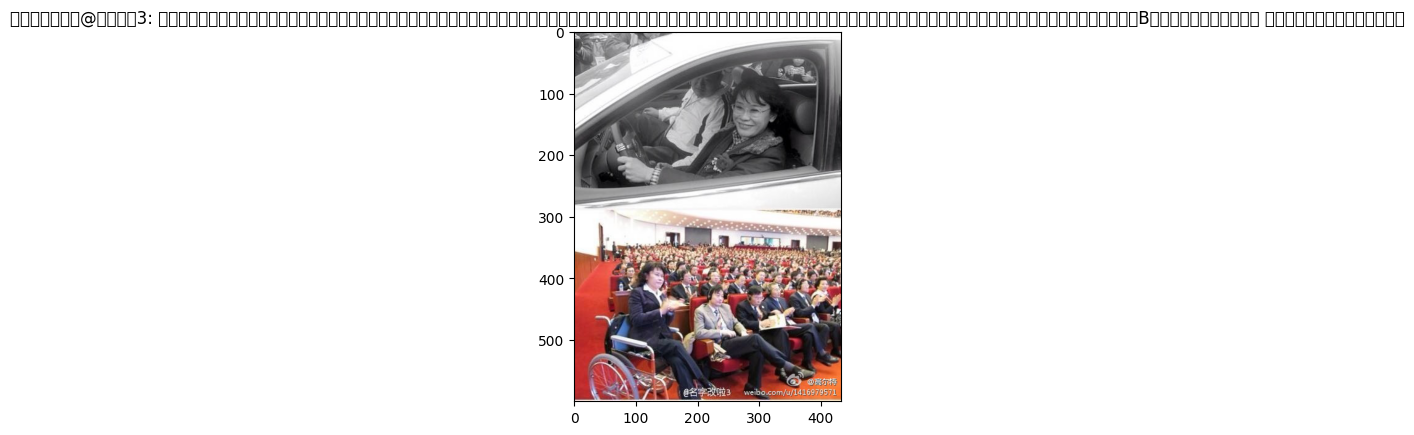

In [50]:
indx = random.randint(0, len(train_df))
print(indx)
visualise(1, train_df)

In [51]:
# Alternate dataframes for modeling
train_df_model = train_df[['tweetText', 'images_1', 'label']]
train_df_model['image_1'] = train_df_model['images_1'].apply(lambda x: find_image_from_name_in_dir(x, IMAGE_DIR))
train_df_model = train_df_model.drop(['images_1'], axis=1)
train_df_model.head(5)

,tweetText,label,image_1
0,【实用贴】九张图告诉你，冬装应该怎么洗。冬季必备技能，get~,1,/content/images/images/620beb06gw1eywpft9ly3j2...
1,【坚强的生命】@名字改啦3: 我最佩服的是一个叫张海迪的人，上小学的时候就听说她得了癌症，活...,0,/content/images/images/54756473jw1ekr737i819j2...
2,现在得白血病的小孩越来越多，妇幼保健院提示您，请不要给宝宝喝爽歪歪和有添加剂的牛奶饮料，告诉...,0,/content/images/images/005XGfHgjw1es5vb37gqgj3...
3,求扩散，今天上午一个三岁多小女孩在龙华大润发超市附近被人拐走了，小女孩能准确说出她爸爸的手机...,0,/content/images/images/aa4cb2f8jw1e769b35se9j2...
4,【治地沟油 看“踢皮球”】号称“史上最严治理地沟油”的措施颁布了两年，而就在此期间，宝山区一...,1,/content/images/images/6e05a6dajw1etr1amzvpnj2...


In [52]:
# Check to make sure all the first_image_id are tied with a path
train_df_model[train_df_model['image_1'].isnull()]

,tweetText,label,image_1


In [53]:
test_df_model = test_df[['tweetText', 'images_1', 'label']]
test_df_model['image_1'] = test_df_model['images_1'].apply(lambda x: find_image_from_name_in_dir(x, IMAGE_DIR))
test_df_model = test_df_model.drop(['images_1'], axis=1)
test_df_model.head(5)

,tweetText,label,image_1
0,【郭美美申请低保，居然获准通过！】郭美美对记者说，她其实就是一个失业人员，并不是大家想象的那...,0,/content/images/images/7fcc7edetw1e6btq03senj2...
1,【看病要付钱只有二十几个国家】中国工程院院士戴勀戎：“看病就得付钱。在我们这里好像天经地义。...,0,/content/images/images/8d5c03a7jw1e6r4cc7x02j2...
2,东北证券吉林公主岭营业部今天上午被愤怒的股民点燃.,0,/content/images/images/3dc2ac30jw1dx457fr1owj.jpg
3,【交通新规】归纳汇总为以下八条，开车的朋友请留意。2013年1月1日开始执行。@于建嵘 @海...,0,/content/images/images/96449d00jw1dyupdyukbkj.jpg
4,隐翅虫,0,/content/images/images/5103ab97gw1dwmttofzfoj.jpg


In [54]:
# Check to make sure all the first_image_id are tied with a path
test_df_model[test_df_model['image_1'].isnull()]

,tweetText,label,image_1


In [55]:
train_df_model['label'].value_counts()

0    3345
1     795
Name: label, dtype: int64

In [56]:
test_df_model['label'].value_counts()

0    862
1    262
Name: label, dtype: int64

### Save the dataframes for faster access

In [57]:
#Save training df
train_df_model.to_pickle(BASE_SAVE_LOCATION+"/weibo-train.pickle")
#Save testing df
test_df_model.to_pickle(BASE_SAVE_LOCATION+"/weibo-test.pickle")